In [1]:
from netCDF4 import Dataset
import numpy as np
fin = Dataset('f522_dh.trainingdata_in.lcv.20190401_0000z.nc4') 
fout = Dataset('f522_dh.trainingdata_out.lcv.20190401_0000z.nc4')
x = fin.variables
y = fout.variables
for var in x.keys():
    print(var, x[var].shape)
    
n   = x['Xdim'].shape[0]    
p   = x['Ydim'].shape[0]

Xdim (720,)
Ydim (4320,)
lons (4320, 720)
lats (4320, 720)
lev (72,)
time (1,)
emis (1, 4320, 720)
fcld (1, 72, 4320, 720)
o3 (1, 72, 4320, 720)
pl (1, 72, 4320, 720)
q (1, 72, 4320, 720)
qi (1, 72, 4320, 720)
ql (1, 72, 4320, 720)
ri (1, 72, 4320, 720)
rl (1, 72, 4320, 720)
t (1, 72, 4320, 720)
ts (1, 4320, 720)


In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.pyplot import figure

idx = int(np.random.random()*n)
idy = int(np.random.random()*p)

plt.plot(y["flx"][0,:,idy,idx])
plt.show()

<Figure size 640x480 with 1 Axes>

86.98259

664 3685


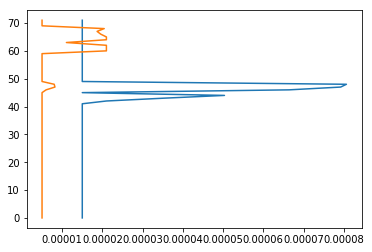

In [77]:
idx = int(np.random.random()*n)
idy = int(np.random.random()*p)
print(idx,idy)
plt.plot(x["ri"][0,:,idy,idx].T,np.arange(72))
plt.plot(x["rl"][0,:,idy,idx].T,np.arange(72));

395 2396


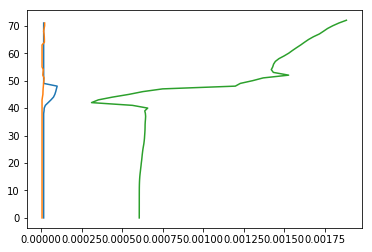

In [138]:
idx = int(np.random.random()*n)
idy = int(np.random.random()*p)
print(idx,idy)

#a=y['flx'][:].mean()
#b=y['flx'][:].std()

plt.plot(x["ri"][0,:,idy,idx].T,np.arange(72));
plt.plot(x["rl"][0,:,idy,idx].T,np.arange(72));
plt.plot( (y["flx"][0,:,idy,idx].T - a)/(1000*b)  , np.arange(73));

In [7]:
d=dict()
d0 = y['flx'][:].std()
for k in x.keys():
    d[k] = x[k][:].std()

In [2]:
cov = []
v1=y['flx'][:].flatten()[-10000:]
for i,k in enumerate(x.keys()):
    if(len(x[k].shape)>3):
        print(k)
        v2=x[k][:].flatten()[-10000:]
        cov.append(np.corrcoef(v1,v2)[0,1])

fcld
o3
pl
q
qi


/home/victor/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/victor/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


ql
ri
rl
t


In [6]:
v2=x['qi'][:].flatten()[-10000:]
print(np.max(v2), np.min(v2))

0.0 0.0


In [26]:
cov

[array([[ 1., nan],
        [nan, nan]]), array([[1.        , 0.25222993],
        [0.25222993, 1.        ]]), array([[ 1., nan],
        [nan, nan]]), array([[1.        , 0.21080508],
        [0.21080508, 1.        ]]), array([[ 1., nan],
        [nan, nan]]), array([[ 1., nan],
        [nan, nan]]), array([[ 1., nan],
        [nan, nan]]), array([[ 1., nan],
        [nan, nan]]), array([[ 1.        , -0.16588551],
        [-0.16588551,  1.        ]])]

In [40]:
f=plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

def plotvar(x, var):
    t = x[var][0].T #Transposed for easier unpacking
    y0 = np.arange(n)
    x0 = np.arange(p)

    nrows, ncols = n, p
    grid = t#temp.reshape((nrows, ncols))

    plt.imshow(grid, extent=(x0.min(), x0.max(), y0.max(), y0.min()),
               interpolation='nearest', cmap=cm.gist_rainbow)

<Figure size 640x480 with 0 Axes>

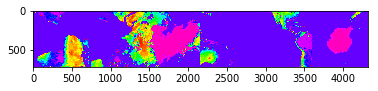

In [43]:
plotvar(x, 'emis');

In [12]:
lat

NameError: name 'lat' is not defined